<div style="font-size:40px;">
Hypothesentest und Varianzanalyse
</div>

# Einleitung Hypothesentest und Varianzanalyse
<div style="text-align: justify;">
Mit der Checkliste wird Schritt für Schritt der Hypothesentest und die Varianzanalyse berechnet.
</div>

Vorgehensweise:

- Daten einlesen
- Annahmen für einen t-Test prüfen
- Tranformation testen
- Ein-Stichproben t-Test
- Zwei-Stichproben t-Test, gepaart, ungepaart
- Effektstärken
- ANOVA

Begründung für die Auswahl des Datensatzes CO2 von R:

- Da bereits bei der Semesterarbeit 1 und Semesterarbeit 2 das Thema EDA vorgekommen ist, wird
hier nicht erneut der Datensatz bereinigt oder auf Schwachstellen überprüft. Somit entfällt die ganze Standardisierung, Normalisierung, Imuputation, usw. Der Datensatz kann somit gleich verwendet werden (Transformation wird kurz angesehen). Eher sollen die Vorbedingungen für den t-test und ANOVA überprüft werden.

- Obwohl die Stichprobengrösse > 30 ist, ist jedoch die Varianz der Grundgesamtheit unbekannt, daher die Auswahl des t-test. Der Z-test käme zur Auswahl bei >=  30 und Varianz der Grundgesamtheit ist bekannt.

#### Resultate der Anpassungsschritte
<div style="text-align: justify;">

-   Es handelt sich um die CO2 Aufnahme von Grass Pflanzen Echinochloa crus-galli, auch genannt Hühnerhirse.

Plant: Ordinale Factors

Type: Factors

Treatment: Factors

conc: Numerisch

Uptak: Numersich
</div>

# Statistisches Vorgehen Hypothesentest und Varianzanalyse

## Annahmen für einen unabhängigen t-Test überprüfen
<div style="text-align: justify;">
Die zu püfenden Annahmen sind: Numerisch mit str, Beobachtungen sind unabhänig voneinander mit Scatterplot und Überprüfung der Korrelation, Varianzüberprüfung mit einem Sample und den Boxplots, Überprüfung der Normalverteilung mit QQ-Plot (separat chilled und nonchilled un darin für die Spalten conc und uptake) und Shapiro-Wilk (ebenfalls auch chilled und nochchilled mit den Spalten con und uptake).
</div>

In [46]:
# Daten einlesen
# Verwendung des Datensatzes CO2
data_co2 <- CO2
head(CO2)
# Überprüfen
str(data_co2)

,Plant,Type,Treatment,conc,uptake
,<ord>,<fct>,<fct>,<dbl>,<dbl>
1,Qn1,Quebec,nonchilled,95,16.0
2,Qn1,Quebec,nonchilled,175,30.4
3,Qn1,Quebec,nonchilled,250,34.8
4,Qn1,Quebec,nonchilled,350,37.2
5,Qn1,Quebec,nonchilled,500,35.3
6,Qn1,Quebec,nonchilled,675,39.2


Classes 'nfnGroupedData', 'nfGroupedData', 'groupedData' and 'data.frame':	84 obs. of  5 variables:
 $ Plant    : Ord.factor w/ 12 levels "Qn1"<"Qn2"<"Qn3"<..: 1 1 1 1 1 1 1 2 2 2 ...
 $ Type     : Factor w/ 2 levels "Quebec","Mississippi": 1 1 1 1 1 1 1 1 1 1 ...
 $ Treatment: Factor w/ 2 levels "nonchilled","chilled": 1 1 1 1 1 1 1 1 1 1 ...
 $ conc     : num  95 175 250 350 500 675 1000 95 175 250 ...
 $ uptake   : num  16 30.4 34.8 37.2 35.3 39.2 39.7 13.6 27.3 37.1 ...
 - attr(*, "formula")=Class 'formula'  language uptake ~ conc | Plant
  .. ..- attr(*, ".Environment")=<environment: R_EmptyEnv> 
 - attr(*, "outer")=Class 'formula'  language ~Treatment * Type
  .. ..- attr(*, ".Environment")=<environment: R_EmptyEnv> 
 - attr(*, "labels")=List of 2
  ..$ x: chr "Ambient carbon dioxide concentration"
  ..$ y: chr "CO2 uptake rate"
 - attr(*, "units")=List of 2
  ..$ x: chr "(uL/L)"
  ..$ y: chr "(umol/m^2 s)"


[1] 0.4851774
[1] 0.4277141
[1] 0.6081648


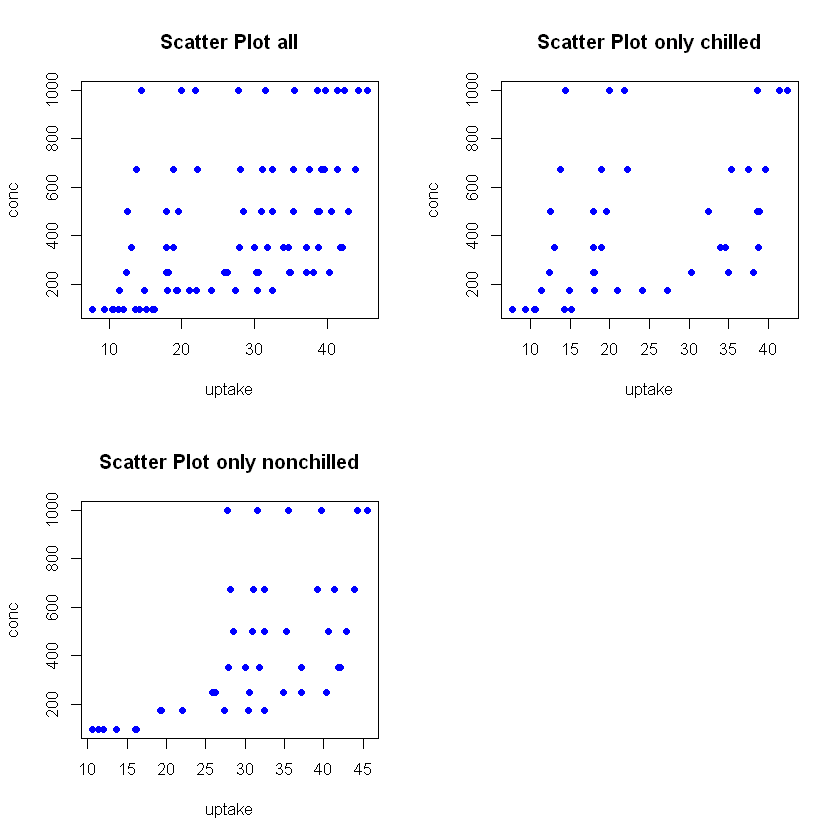

In [47]:
library(dplyr)
# Annahmen prüfen
# Die Daten sind numerisch, siehe Datensatz

# Die Beobachtungen sind unabhängig voneinander
chilled <- data_co2 %>% filter(data_co2$Treatment == "chilled")
nonchilled <- data_co2 %>% filter(data_co2$Treatment == "nonchilled")

par(mfrow = c(2, 2))
plot(data_co2$uptake, data_co2$conc, main = "Scatter Plot all",
     xlab = "uptake", ylab = "conc",
     pch = 19, col = "blue")

plot(chilled$uptake, chilled$conc, main = "Scatter Plot only chilled",
     xlab = "uptake", ylab = "conc",
     pch = 19, col = "blue")

plot(nonchilled$uptake, nonchilled$conc, main = "Scatter Plot only nonchilled",
     xlab = "uptake", ylab = "conc",
     pch = 19, col = "blue")

correlation <- cor(data_co2$uptake, data_co2$conc)
print(correlation)

correlation <- cor(chilled$uptake, chilled$conc)
print(correlation)

correlation <- cor(nonchilled$uptake, nonchilled$conc)
print(correlation)

<div style="text-align: justify;">
Sowhol Scatterplot wie auch die Zahlenwerte deuten auf Unabhängigkeit, dazu mehr bei den Resultaten.
</div>

# A tibble: 2 × 4
  Treatment  sample_size mean_value sd_value
  <fct>            <int>      <dbl>    <dbl>
1 nonchilled          42       30.6     9.70
2 chilled             42       23.8    10.9 
# A tibble: 2 × 4
  Treatment  sample_size mean_value sd_value
  <fct>            <int>      <dbl>    <dbl>
1 nonchilled          42        435     298.
2 chilled             42        435     298.


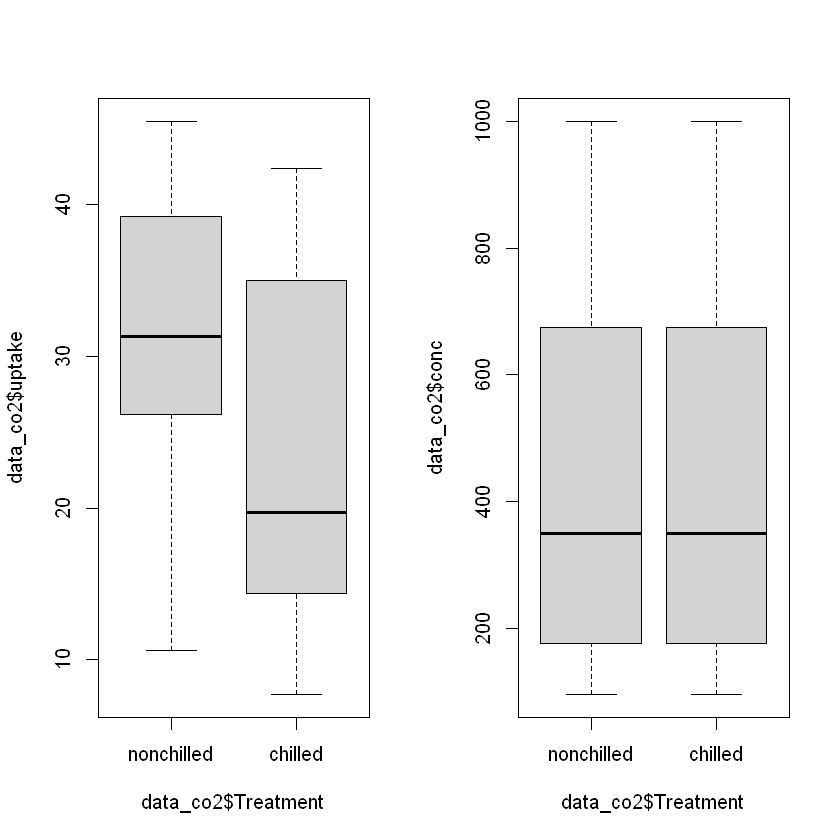

In [48]:
par(mfrow = c(1, 2))
data_frame1 <- boxplot(data_co2$uptake~data_co2$Treatment, data=data_co2)
data_frame2 <- boxplot(data_co2$conc~data_co2$Treatment, data=data_co2)

# Sample size, Mean, SD für chilled, nonchilled und uptake
df_summary1 <- data_co2 %>%
  group_by(Treatment) %>%
  summarise(
    sample_size = n(),
    mean_value = mean(uptake),
    sd_value = sd(uptake)
  )

print(df_summary1)

# Sample size, Mean, SD für chilled, nonchilled und conc
df_summary2 <- data_co2 %>%
  group_by(Treatment) %>%
  summarise(
    sample_size = n(),
    mean_value = mean(conc),
    sd_value = sd(conc)
  )

print(df_summary2)

<div style="text-align: justify;">
Die Überprüfung der Varianz ist bei uptake mit 9.7 und 10.9 ähnlich, bei conc gleich.
</div>

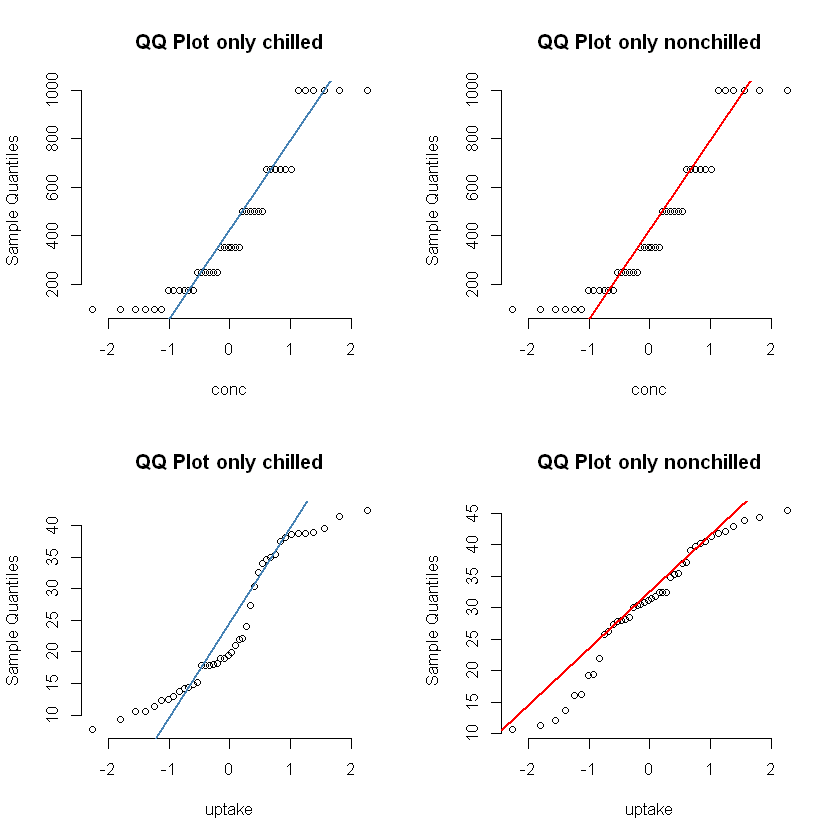

In [49]:
# Stichproben sind annährend normalverteilt, mit QQ Plot und Shapiro-Wilk
# Erstellung der Data frames
chilled <- data_co2 %>% filter(data_co2$Treatment == "chilled")
nonchilled <- data_co2 %>% filter(data_co2$Treatment == "nonchilled")

par(mfrow = c(2, 2))
# QQ  Plots
qqnorm(chilled$conc, pch = 1, frame = FALSE, main = "QQ Plot only chilled",
     xlab = "conc")
qqline(chilled$conc, col = "steelblue", lwd = 2)
qqnorm(nonchilled$conc, pch = 1, frame = FALSE,  main = "QQ Plot only nonchilled",
     xlab = "conc")
qqline(nonchilled$conc, col = "red", lwd = 2)
qqnorm(chilled$uptake, pch = 1, frame = FALSE,  main = "QQ Plot only chilled",
     xlab = "uptake")
qqline(chilled$uptake, col = "steelblue", lwd = 2)
qqnorm(nonchilled$uptake, pch = 1, frame = FALSE,   main = "QQ Plot only nonchilled",
     xlab = "uptake")
qqline(nonchilled$uptake, col = "red", lwd = 2)

<div style="text-align: justify;">
Die Normalverteilung ist eher nicht gegeben.
</div>


	Shapiro-Wilk normality test

data:  chilled$conc
W = 0.87236, p-value = 0.0002367



	Shapiro-Wilk normality test

data:  nonchilled$conc
W = 0.87236, p-value = 0.0002367


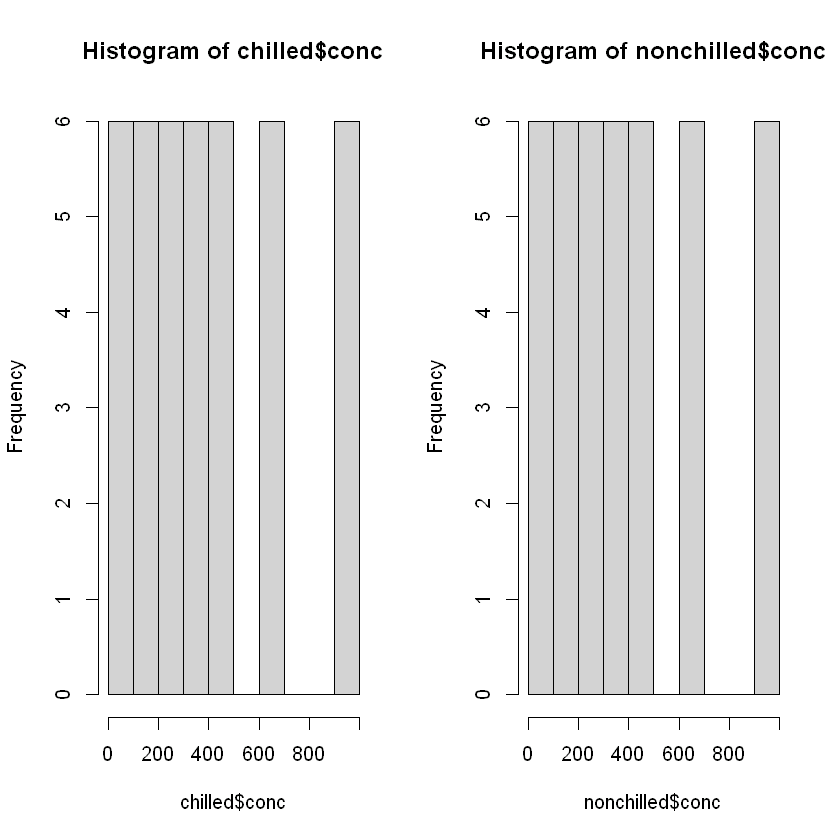

In [50]:
# Shapiro-Wilk mit Histogramm für Spalte conc
par(mfrow = c(1, 2))
hist(chilled$conc)
shapiro.test(chilled$conc)
hist(nonchilled$conc)
shapiro.test(nonchilled$conc)

<div style="text-align: justify;">
Für die Spalte conc zeigt weder das Histogramm noch der Shapiro mit p-value = 0.0002367 eine Normalverteilung.
</div>


	Shapiro-Wilk normality test

data:  chilled$uptake
W = 0.89789, p-value = 0.001245



	Shapiro-Wilk normality test

data:  nonchilled$uptake
W = 0.94505, p-value = 0.04302


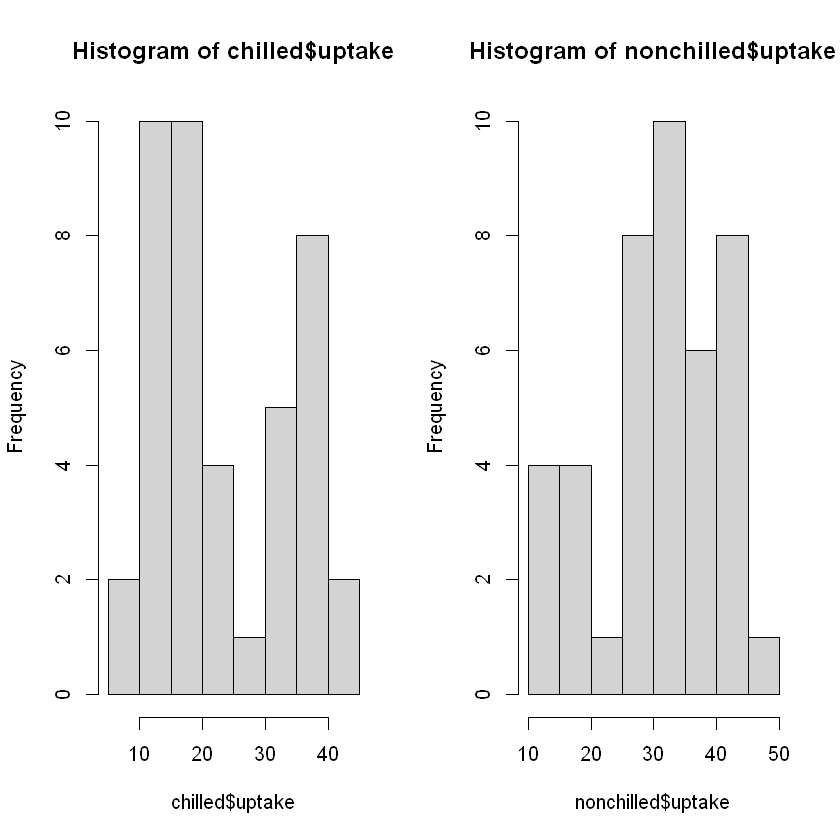

In [52]:
# Shapiro-Wilk mit Histogramm für Spalte uptake
par(mfrow = c(1, 2))
hist(chilled$uptake)
shapiro.test(chilled$uptake)
hist(nonchilled$uptake)
shapiro.test(nonchilled$uptake)

<div style="text-align: justify;">
Für die Spalte uptake zeigt weder das Histogramm noch der Shapiro mit  p-value = 0.001245 und p-value = 0.04302 eine Normalverteilung. Hier gibt es zwei unterschiedliche p-values weil sich die Werte hier nicht wiederholen. Bei conc wiederholen sich diese Werte ja.
</div>

### Resultat Annahmen für einen unabhängigen t-Test überprüfen
<div style="text-align: justify;">

- Ja, die zu untersuchenden Spalten sin numerisch.

- Die Daten sind unabhänig voneinander. Mit dem Scatterplot kann man kein Muster erkennen. Die Werte 0.4851774 (conc und uptake), 0.4277141 (Subset chilled conc und uptake), 0.6081648 (Subset nonchilled conc und uptake) deuten auf eine geringe Korrelation hin. Trotzdem kann man annehmen, dass bei der Aufnahme von Co2 auch die Konzentration steigt, dies für bei der Kühlung oder bei keiner Kühlung. Es gibt einen Zusammenhang.

- df_summary1 der Mittelwert ist unterschiedlich, anhand des Boxplots erkennt man eine ähnliche Streuung, es scheint, dass die "gleiche Varianz" Annahme nicht verletzt ist. Dies mit den Werten 9.7 und 10.9.

- df_summary2 zeigt gleiche Boxplots, weil die Werte sich wiederholen in der conc Spalte. Die ähnliche Streuung ist hier klar, die "gleiche Varianz" Annahme ist nicht verletzt. Dies mit den Werten 298 und 298.

- Die QQ Plot deuten eher auf keine Normalverteilung. Auch hier wird für chilled und nonchilled mit den Spalten conc und uptake überprüft.

- Für die Spalte conc gibt das Histogramm an, dass es sich nicht um eine Normalverteilung handelt, der Shapiro mit p-value = 0.0002367 verwirft die Nullhypothese ebenfalls, es ist keine Normalverteilung. Es sei angemerkt, dass beide Histogramme und Shapiros gleich sind, das verwundert nicht, die Werte wiederholen sich ja.

- Für die Spalte uptake gibt das Histogramm an, dass es sich nicht um eine typische Normalverteilung handelt (bimodal?), der Shapiro mit p-value = 0.001245 und p-value = 0.04302 verwirft ebenfalls die Normalverteilung.

- Des Weiteren: Hier habe ich nur Treatment berücksichtigt, ohne Type. 

- Die folgende Log und Square Transformation liefern keine besseren Resultate. Wir haben aber annährend Normalverteilung und könnten p = 0.01 wählen, sollte man den Fehler tolerieren wollen. Es wird nun mit dem Datensatz gearbeitet, ohne Transformation.
</div>

## Transformation Log
<div style="text-align: justify;">
Mit der Log Tansformation soll gesehen werden, ob sich die Resultate verbessern.
</div>


	Shapiro-Wilk normality test

data:  chilled$log_conc
W = 0.92636, p-value = 0.009783



	Shapiro-Wilk normality test

data:  nonchilled$log_conc
W = 0.92636, p-value = 0.009783



	Shapiro-Wilk normality test

data:  chilled$log_uptake
W = 0.93472, p-value = 0.01876


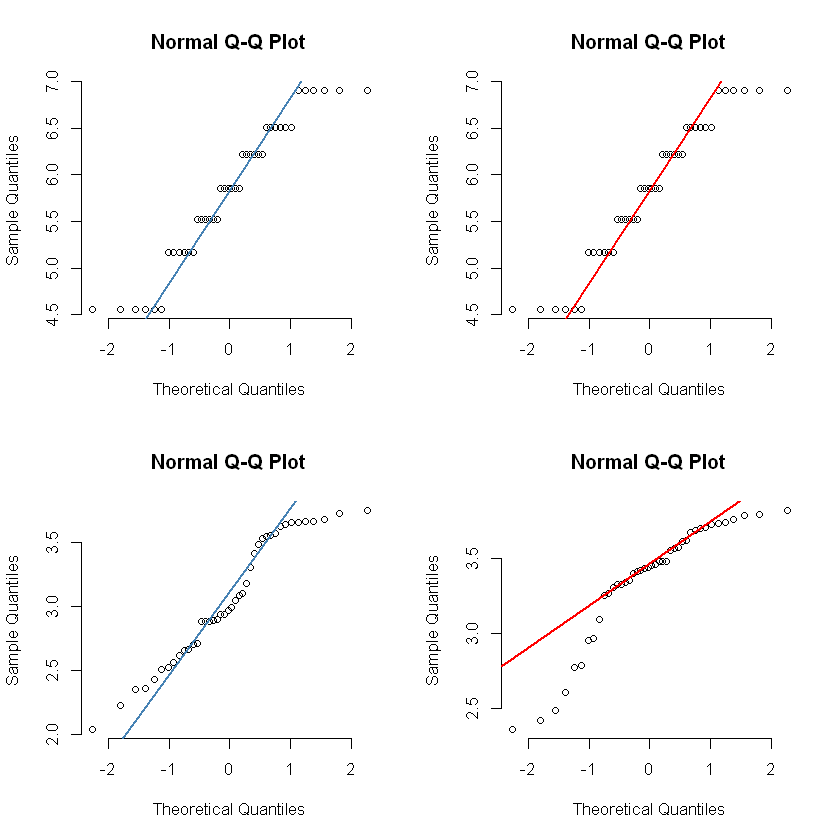


	Shapiro-Wilk normality test

data:  nonchilled$log_uptake
W = 0.86729, p-value = 0.0001733


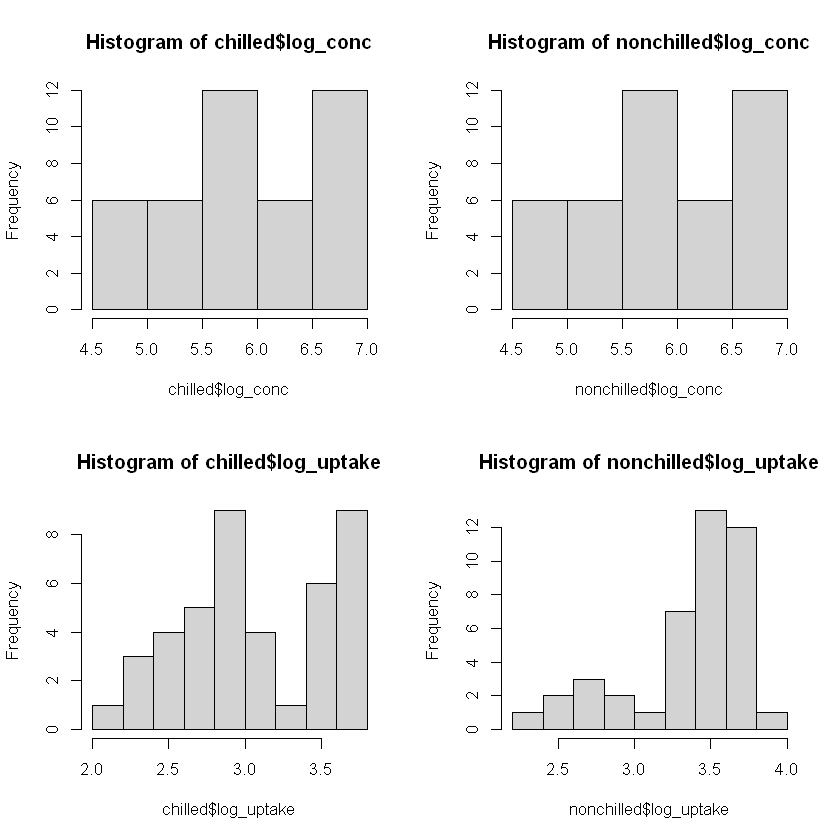

In [53]:
# Log
data_co2$log_conc <- log(data_co2$conc)
data_co2$log_uptake <- log(data_co2$uptake)
chilled$log_conc <- log(chilled$conc)
chilled$log_uptake <- log(chilled$uptake)
nonchilled$log_conc <- log(nonchilled$conc)
nonchilled$log_uptake <- log(nonchilled$uptake)

par(mfrow = c(2, 2))
qqnorm(chilled$log_conc, pch = 1, frame = FALSE)
qqline(chilled$log_conc, col = "steelblue", lwd = 2)
qqnorm(nonchilled$log_conc, pch = 1, frame = FALSE)
qqline(nonchilled$log_conc, col = "red", lwd = 2)
qqnorm(chilled$log_uptake, pch = 1, frame = FALSE)
qqline(chilled$log_uptake, col = "steelblue", lwd = 2)
qqnorm(nonchilled$log_uptake, pch = 1, frame = FALSE)
qqline(nonchilled$log_uptake, col = "red", lwd = 2)

# Shapiro-Wilk mit Histogramm für Spalte conc
hist(chilled$log_conc)
shapiro.test(chilled$log_conc)
hist(nonchilled$log_conc)
shapiro.test(nonchilled$log_conc)

# Shapiro-Wilk mit Histogramm für Spalte uptake
hist(chilled$log_uptake)
shapiro.test(chilled$log_uptake)
hist(nonchilled$log_uptake)
shapiro.test(nonchilled$log_uptake)

### Resultat Transforamtion Log
<div style="text-align: justify;">
    
- Log verbessert den Datensatz nicht wirklich. Die Shapiros p-value = 0.009783, p-value = 0.01876, p-value = 0.0001733 verwerfen die Normalverteilung.

- ODER: Für chilled uptake und nonchilled uptake sieht es gemäss den Histogrammen nach einer bimodal normal distribution aus, somit wäre die Normalverteilung ebenfalls erreicht. Ob dies so zu verwenden ist, kann untersucht werden.
</div>

## Transformation Square
<div style="text-align: justify;">
Mit der Square Tansformation soll gesehen werden, ob sich die Resultate verbessern.
</div>


	Shapiro-Wilk normality test

data:  chilled$square_conc
W = 0.92088, p-value = 0.00646



	Shapiro-Wilk normality test

data:  nonchilled$square_conc
W = 0.92088, p-value = 0.00646



	Shapiro-Wilk normality test

data:  chilled$square_uptake
W = 0.92156, p-value = 0.006797


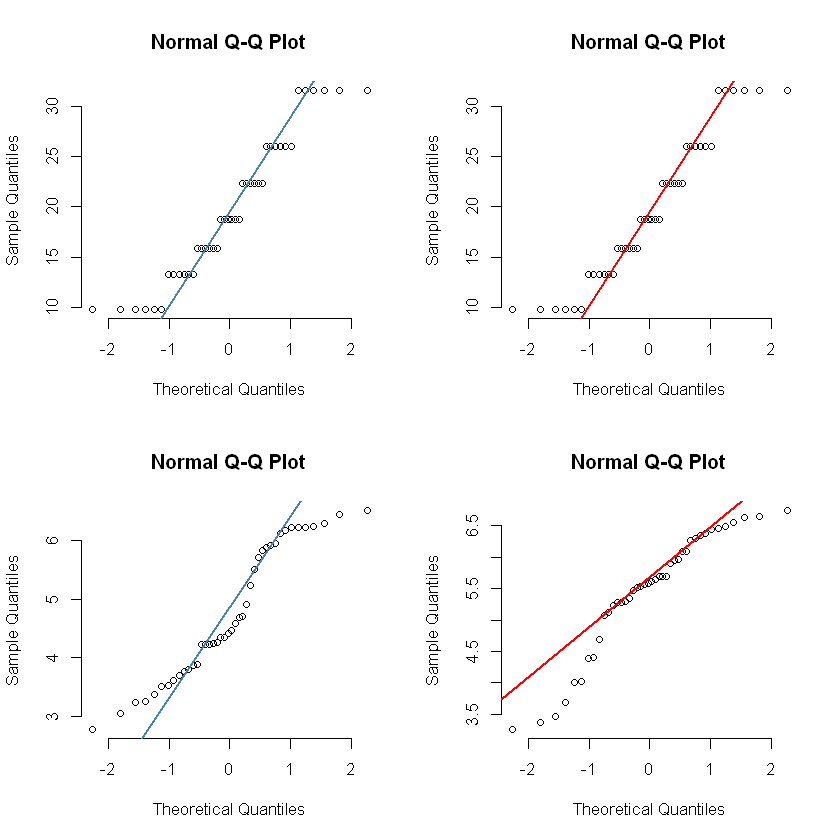


	Shapiro-Wilk normality test

data:  nonchilled$square_uptake
W = 0.91392, p-value = 0.003862


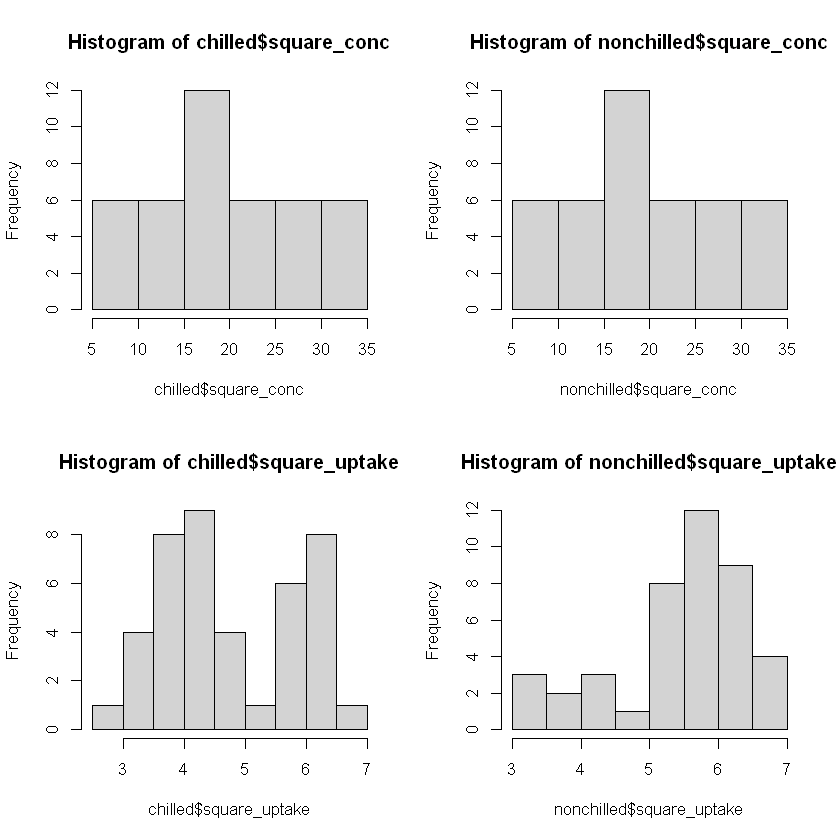

In [54]:
# Square
data_co2$square_conc <- sqrt(data_co2$conc)
data_co2$square_uptake <- sqrt(data_co2$uptake)
chilled$square_conc <- sqrt(chilled$conc)
chilled$square_uptake <- sqrt(chilled$uptake)
nonchilled$square_conc <- sqrt(nonchilled$conc)
nonchilled$square_uptake <- sqrt(nonchilled$uptake)

par(mfrow = c(2, 2))
qqnorm(chilled$square_conc, pch = 1, frame = FALSE)
qqline(chilled$square_conc, col = "steelblue", lwd = 2)
qqnorm(nonchilled$square_conc, pch = 1, frame = FALSE)
qqline(nonchilled$square_conc, col = "red", lwd = 2)
qqnorm(chilled$square_uptake, pch = 1, frame = FALSE)
qqline(chilled$square_uptake, col = "steelblue", lwd = 2)
qqnorm(nonchilled$square_uptake, pch = 1, frame = FALSE)
qqline(nonchilled$square_uptake, col = "red", lwd = 2)

# Shapiro-Wilk mit Histogramm für Spalte conc
hist(chilled$square_conc)
shapiro.test(chilled$square_conc)
hist(nonchilled$square_conc)
shapiro.test(nonchilled$square_conc)

# Shapiro-Wilk mit Histogramm für Spalte uptake
hist(chilled$square_uptake)
shapiro.test(chilled$square_uptake)
hist(nonchilled$square_uptake)
shapiro.test(nonchilled$square_uptake)

### Resultat Transformation Square
<div style="text-align: justify;">
    
- Square verbessert den Datensatz nicht wirklich. Die Shapiros p-value = 0.00646, p-value = 0.006797, p-value = 0.003862 verwerfen die Normalverteilung.

- ODER: Für chilled uptake und nonchilled uptake sieht es gemäss den Histogrammen nach einer bimodal normal distribution aus, somit wäre die Normalverteilung ebenfalls erreicht. Ob dies so zu verwenden ist, kann untersucht werden.  
</div>

## Ein-Stichproben t-Test
<div style="text-align: justify;">
Hier wird überprüft ob sich der Mittelwert stark von einem theoretischen Wert unterscheidet.
</div>

In [55]:
# Einstichprobentest mit theoretischem Mittelwert Abgleich
t.test(data_co2$uptake, mu=15)
t.test(data_co2$uptake, mu=20)
t.test(data_co2$uptake, mu=25)
t.test(data_co2$uptake, mu=27)
t.test(data_co2$uptake, mu=30)
t.test(data_co2$uptake, mu=35)
t.test(data_co2$uptake, mu=100)


	One Sample t-test

data:  data_co2$uptake
t = 10.351, df = 83, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 15
95 percent confidence interval:
 24.86622 29.55997
sample estimates:
mean of x 
  27.2131 



	One Sample t-test

data:  data_co2$uptake
t = 6.1131, df = 83, p-value = 3.053e-08
alternative hypothesis: true mean is not equal to 20
95 percent confidence interval:
 24.86622 29.55997
sample estimates:
mean of x 
  27.2131 



	One Sample t-test

data:  data_co2$uptake
t = 1.8756, df = 83, p-value = 0.06423
alternative hypothesis: true mean is not equal to 25
95 percent confidence interval:
 24.86622 29.55997
sample estimates:
mean of x 
  27.2131 



	One Sample t-test

data:  data_co2$uptake
t = 0.1806, df = 83, p-value = 0.8571
alternative hypothesis: true mean is not equal to 27
95 percent confidence interval:
 24.86622 29.55997
sample estimates:
mean of x 
  27.2131 



	One Sample t-test

data:  data_co2$uptake
t = -2.3619, df = 83, p-value = 0.02052
alternative hypothesis: true mean is not equal to 30
95 percent confidence interval:
 24.86622 29.55997
sample estimates:
mean of x 
  27.2131 



	One Sample t-test

data:  data_co2$uptake
t = -6.5994, df = 83, p-value = 3.64e-09
alternative hypothesis: true mean is not equal to 35
95 percent confidence interval:
 24.86622 29.55997
sample estimates:
mean of x 
  27.2131 



	One Sample t-test

data:  data_co2$uptake
t = -61.686, df = 83, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 100
95 percent confidence interval:
 24.86622 29.55997
sample estimates:
mean of x 
  27.2131 


### Resultat Ein-Stichproben t-Test
<div style="text-align: justify;">
    
- Bei mu=25 und mu=27 verwerfen wir die Nullhypothese nicht, der angenommene theoretische Mittelwert der Population scheint zu stimmen, es gibt keinen signifikanten Unterschied.  Mit p-values 0.06423 und 0.8571 nehmen wir die Nullhypothese an. Das Konfidenzintervall liegt bei 24.86622 29.55997.

- Man erkennt die Zunahme und Abbnahme des p-values bei den ausgewählten theoretischen Populationsmittelwerten.
</div>

## Zwei-Stichproben t-Test, unabhängig
<div style="text-align: justify;">
Hier wird untersucht, ob sich die Mittelwerte von zwei Stichproben sich signifikant unterscheiden.
</div>

In [56]:
# gleiche Varianz
t.test(data_co2$uptake ~ data_co2$Treatment, var.equal = TRUE, alternative= "two.sided")
t.test(data_co2$uptake ~ data_co2$Treatment, var.equal = TRUE, alternative= "less")
t.test(data_co2$uptake ~ data_co2$Treatment, var.equal = TRUE, alternative= "greater")


	Two Sample t-test

data:  data_co2$uptake by data_co2$Treatment
t = 3.0485, df = 82, p-value = 0.003096
alternative hypothesis: true difference in means between group nonchilled and group chilled is not equal to 0
95 percent confidence interval:
  2.38324 11.33581
sample estimates:
mean in group nonchilled    mean in group chilled 
                30.64286                 23.78333 



	Two Sample t-test

data:  data_co2$uptake by data_co2$Treatment
t = 3.0485, df = 82, p-value = 0.9985
alternative hypothesis: true difference in means between group nonchilled and group chilled is less than 0
95 percent confidence interval:
   -Inf 10.603
sample estimates:
mean in group nonchilled    mean in group chilled 
                30.64286                 23.78333 



	Two Sample t-test

data:  data_co2$uptake by data_co2$Treatment
t = 3.0485, df = 82, p-value = 0.001548
alternative hypothesis: true difference in means between group nonchilled and group chilled is greater than 0
95 percent confidence interval:
 3.116048      Inf
sample estimates:
mean in group nonchilled    mean in group chilled 
                30.64286                 23.78333 


In [57]:
# ungleiche Varianz
t.test(data_co2$uptake ~ data_co2$Treatment, var.equal = FALSE, alternative= "two.sided")
t.test(data_co2$uptake ~ data_co2$Treatment, var.equal = FALSE, alternative= "less")
t.test(data_co2$uptake ~ data_co2$Treatment, var.equal = FALSE, alternative= "greater")


	Welch Two Sample t-test

data:  data_co2$uptake by data_co2$Treatment
t = 3.0485, df = 80.945, p-value = 0.003107
alternative hypothesis: true difference in means between group nonchilled and group chilled is not equal to 0
95 percent confidence interval:
  2.382366 11.336682
sample estimates:
mean in group nonchilled    mean in group chilled 
                30.64286                 23.78333 



	Welch Two Sample t-test

data:  data_co2$uptake by data_co2$Treatment
t = 3.0485, df = 80.945, p-value = 0.9984
alternative hypothesis: true difference in means between group nonchilled and group chilled is less than 0
95 percent confidence interval:
     -Inf 10.60356
sample estimates:
mean in group nonchilled    mean in group chilled 
                30.64286                 23.78333 



	Welch Two Sample t-test

data:  data_co2$uptake by data_co2$Treatment
t = 3.0485, df = 80.945, p-value = 0.001553
alternative hypothesis: true difference in means between group nonchilled and group chilled is greater than 0
95 percent confidence interval:
 3.11549     Inf
sample estimates:
mean in group nonchilled    mean in group chilled 
                30.64286                 23.78333 


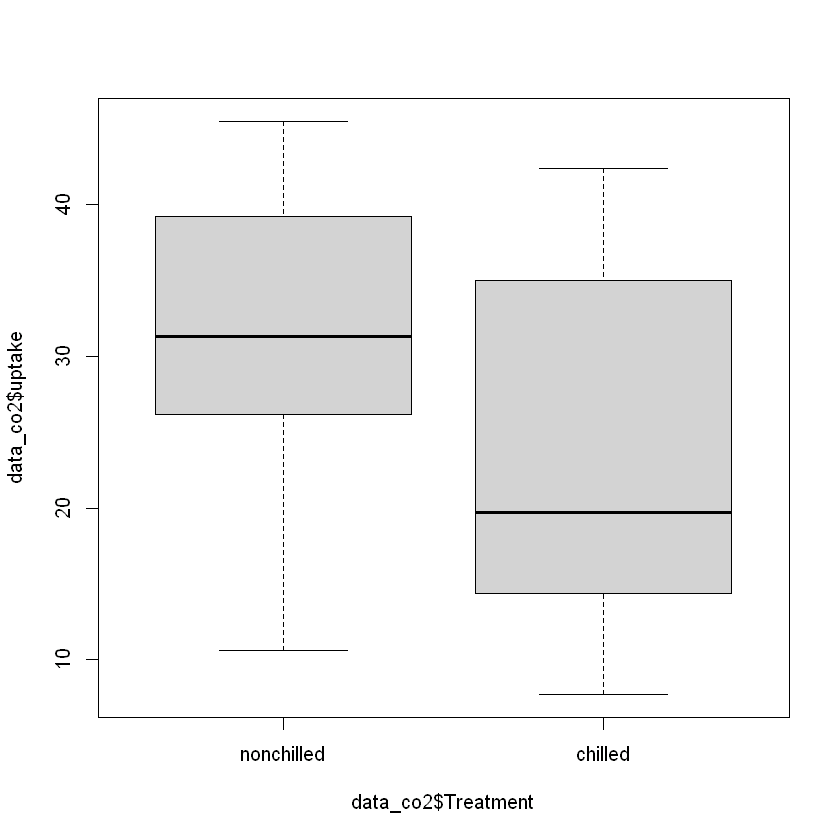

In [58]:
boxplot(data_co2$uptake~data_co2$Treatment, data=data_co2)

### Resultat Zwei-Stichproben t-Test, unabhängig
<div style="text-align: justify;">
    s
- Ungleiche Varianz wird trotzdem getestet, auch wenn wir aus den Annahmen erkennen, dass die gleiche Varianz Annahme nicht verletzt ist.

- Mit gleicher Varianz und ungleicher Varianz:

Mit gleicher Varianz:
- p-value = 0.003096 (two sided)
- p-value = 0.9985 (less)
- p-value = 0.001548 (greater)

Mit ungleicher Varianz:
- p-value = 0.003107 (two sided)
- p-value = 0.9984 (less)
- p-value = 0.001553 (greater)

- Mit p-value = 0.9985 kann klar gesagt werden, dass bei den Gruppen chilled und nonchilled die Mittelwerte sich unterscheiden, nonchilled 30.64286 und chilled 23.78333, siehe auch Boxplot. Der umgekehre Fall ist ebenfalls korrekt, mit p-value = 0.001548 müssen wir die Nullhypothese verwerfen, denn ist der eine Wert grösser, kann er nicht auch gleichzeitig kleiner sein. Mit p-value = 0.003096 kann die Nullhypothese verworfen werden, es muss ein kleiner gleich oder grösser gleich exisitieren, die Mittelwerte können nicht gleich sein.
</div>

## Gepaarter t-test, Paardifferenzentest, abhängig
<div style="text-align: justify;">

</div>

In [59]:
t.test(data_co2$uptake[data_co2$Treatment == "chilled"], data_co2$uptake[data_co2$Treatment == "nonchilled"], paired = TRUE)


	Paired t-test

data:  data_co2$uptake[data_co2$Treatment == "chilled"] and data_co2$uptake[data_co2$Treatment == "nonchilled"]
t = -7.939, df = 41, p-value = 8.051e-10
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
 -8.604458 -5.114589
sample estimates:
mean difference 
      -6.859524 


### Resultat Gepaarter t-test, Paardifferenzentest, abhängig
<div style="text-align: justify;">
    
- Es gibt mit p-value = 8.051e-10 einen signifikanten Unterschied zwischen den Mittelwerten der Gruppen.

</div>

## Effect sizes
<div style="text-align: justify;">
Mit der Effektstärke kann nun die Grösse des Unterschieds berechnet werden.
</div>

In [60]:
# Cohen's d One-sample
# d = x - mu / s
# x: Mittelwert der Stichprobe
# mu: Mittwert der Nullhypothese
# s: Standardabweichung der Stichprobe
install.packages("rstatix")
library(rstatix)

# One-sample t-test effect size
cohens_d(formula = uptake ~ 1, data=data_co2, mu=15) 
cohens_d(formula = uptake ~ 1, data=data_co2, mu=20) 
cohens_d(formula = uptake ~ 1, data=data_co2, mu=25) 
cohens_d(formula = uptake ~ 1, data=data_co2, mu=27) 
cohens_d(formula = uptake ~ 1, data=data_co2, mu=30) 
cohens_d(formula = uptake ~ 1, data=data_co2, mu=35) 
cohens_d(formula = uptake ~ 1, data=data_co2, mu=100) 

# Cohen's d Two indepedent samples t-test effect size
# d = x1 -x2 / sqrt((s1^2+s2^2) / 2)
# x1,x2: Mittelwert der Stichproben
# s1^2,s2^2: Varianzen der Stichproben

#  Two-sample t-test effect size
cohens_d(formula = uptake ~ Treatment, paired = FALSE, data=data_co2)

# Cohen's d Two indepedent samples t-test effect size mit den Gruppen
# d = (x1 -x2) / s
# x1,x2: Mittelwerte der Gruppe chilled und nonchilled
# s: Standardabweichng der Population
# Geht nicht!

Warning message:
"package 'rstatix' is in use and will not be installed"


,.y.,group1,group2,effsize,n,magnitude
,<chr>,<chr>,<chr>,<dbl>,<int>,<ord>
Cohen's d,uptake,1,null model,1.129335,84,large


,.y.,group1,group2,effsize,n,magnitude
,<chr>,<chr>,<chr>,<dbl>,<int>,<ord>
Cohen's d,uptake,1,null model,0.6669891,84,moderate


,.y.,group1,group2,effsize,n,magnitude
,<chr>,<chr>,<chr>,<dbl>,<int>,<ord>
Cohen's d,uptake,1,null model,0.2046431,84,small


,.y.,group1,group2,effsize,n,magnitude
,<chr>,<chr>,<chr>,<dbl>,<int>,<ord>
Cohen's d,uptake,1,null model,0.01970475,84,negligible


,.y.,group1,group2,effsize,n,magnitude
,<chr>,<chr>,<chr>,<dbl>,<int>,<ord>
Cohen's d,uptake,1,null model,-0.2577028,84,small


,.y.,group1,group2,effsize,n,magnitude
,<chr>,<chr>,<chr>,<dbl>,<int>,<ord>
Cohen's d,uptake,1,null model,-0.7200488,84,moderate


,.y.,group1,group2,effsize,n,magnitude
,<chr>,<chr>,<chr>,<dbl>,<int>,<ord>
Cohen's d,uptake,1,null model,-6.730546,84,large


,.y.,group1,group2,effsize,n1,n2,magnitude
,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<ord>
Cohen's d,uptake,nonchilled,chilled,0.6652288,42,42,moderate


### Resultat Effect sizes
<div style="text-align: justify;">
    
Nebst der statistischen Signifikanz soll der Unterschied mit der Effektstärke bestimt werden.
Mit der Effektstärke kann die Grösse des Unterschieds bestimmt werden. Diese wird dann anschliessend füt den power-test als Input verwendet.

Resultat:

- One-sample t-test effect size Resultate:

mu=15 1.129335

mu=20 0.6669891

mu=25 0.2046431	

mu=27 0.01970475

mu=30 -0.2577028

mu=35 -0.7200488

mu=100 -6.730546

abs(d) < 0.2 vernachlässigbar

0.2 <= abs(d) < 0.5 klein

0.5 <= abs(d) < 0.8 mittel

abs(d) >= 0.8 gross

- Bei mu=27 erkennt man den Unterschied "vernachlässigbar". Dies deckt sich auch mit dem Test der Signifikanz, der bei 27 ein besseres Resultat liefert.

- Die neagtiven Zahlen können ignoriert werden, der Test würde sagen, diese würde wieder besser abschneiden, aber nur weil d als absoluter Wert verwendet wird.

- Two-sample t-test effect size:

Die Effektstärke ist 0.6652288 und das kommt hin, wenn man den Test von früher berücksichtigt, es muss ein Unterschied vorhanden sein, was die Mittelwerte aus dem Test so zeigen:
Nonchilled: 30.64286
Chilled: 23.78333

-  Die zweite Variante des Cohen's d Two indepedent samples t-test geht nicht, da die Standardabweichung der Population nicht bekannt ist.

</div>

## Trennschärfe, power of a test für den t-test
<div style="text-align: justify;">

</div>

In [61]:
# Power Analyse für den t-test one-sample
# d= sind die Effektstärken
power.t.test(n=84, d=1.129335, type=c("one.sample"))
power.t.test(n=84, d=0.6669891, type=c("one.sample"))
power.t.test(n=84, d=0.2046431, type=c("one.sample"))
power.t.test(n=84, d=0.01970475, type=c("one.sample"))             

# Power Analyse für den t-test two-sample
power.t.test(n=84, d=0.6652288, type=c("two.sample"))


     One-sample t test power calculation 

              n = 84
          delta = 1.129335
             sd = 1
      sig.level = 0.05
          power = 1
    alternative = two.sided



     One-sample t test power calculation 

              n = 84
          delta = 0.6669891
             sd = 1
      sig.level = 0.05
          power = 0.9999776
    alternative = two.sided



     One-sample t test power calculation 

              n = 84
          delta = 0.2046431
             sd = 1
      sig.level = 0.05
          power = 0.4577539
    alternative = two.sided



     One-sample t test power calculation 

              n = 84
          delta = 0.01970475
             sd = 1
      sig.level = 0.05
          power = 0.03741997
    alternative = two.sided



     Two-sample t test power calculation 

              n = 84
          delta = 0.6652288
             sd = 1
      sig.level = 0.05
          power = 0.9899945
    alternative = two.sided

NOTE: n is number in *each* group


### Resultat Trennschärfe, power of a test für den t-test
<div style="text-align: justify;">
    
- Die Resultate sind ählich wie bei der Effektstärke und dem vorangegangenen T-test für eine Stichprobe: Mit einer Teststärke von 1 kann gesagt werden, dass ein Unterschied vorhanden ist, mit 3.741% wird kein Unterschied mehr erkannt. Die 3.741% decken sich mit dem Resultat auch vom t-Test mit mu=27.

- Bei dem Zwistichprobentest ist die Effektstärke 66.5%, somit im Bereich "Mittel", die Teststärke 98.99%, ein Unterschied kann hier tatsächlich gefunden werden, sollte einer existieren.
</div>

## ANOVA (einfaktorielle Varianzanalyse)
<div style="text-align: justify;">

</div>

            Df Sum Sq Mean Sq F value Pr(>F)  
plant$group  2  3.766  1.8832   4.846 0.0159 *
Residuals   27 10.492  0.3886                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

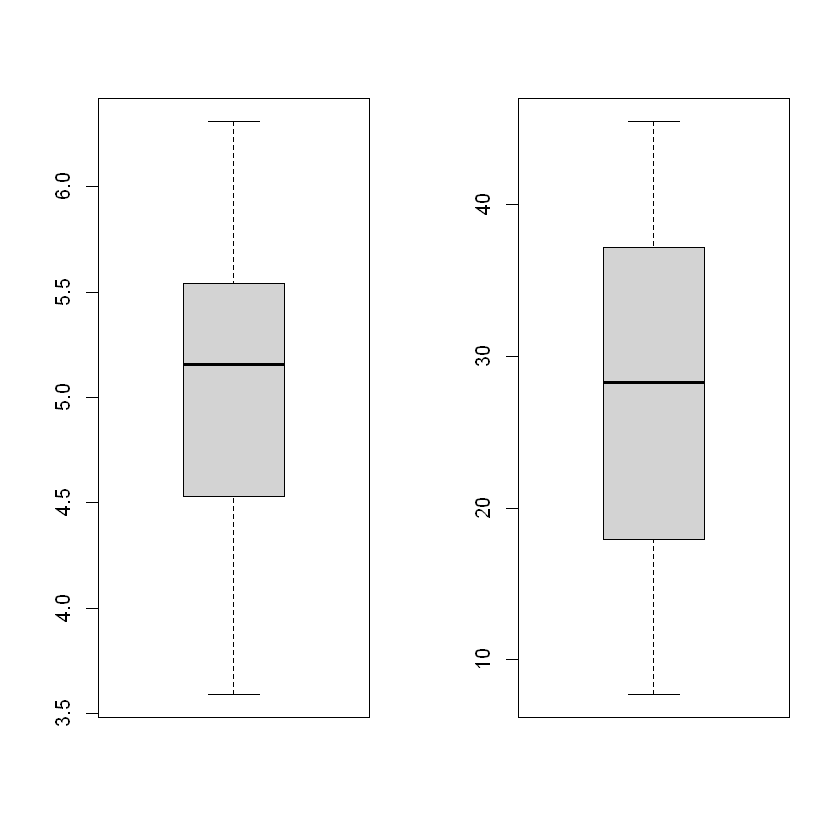

In [62]:
# Neuer Datensatz für ANOVA
plant <- PlantGrowth

# Annahmen prüfen, Outliers
par(mfrow = c(1, 2))
boxplot(plant$weight, data=plant)
boxplot(data_co2$uptake, data=plant)

# AOV
aov <- aov(plant$weight~plant$group) 
summary(aov)

In [63]:
# Bonferroni Anpassung
pairwise.t.test(plant$weight,plant$group, p.adjust="bonferroni")


	Pairwise comparisons using t tests with pooled SD 

data:  plant$weight and plant$group 

     ctrl  trt1 
trt1 0.583 -    
trt2 0.263 0.013

P value adjustment method: bonferroni 

### Resultat ANOVA (einfaktorielle Varianzanalyse) auf Datensatz plant
<div style="text-align: justify;">
    
- Es gibt keine Outliers, somit sind alle Annahmen (siehe zuoberst + Outlier) unverletzt. Im Boxplot sind keine Outliers zu erkennen.

- (AOV) Mit einem Wert von 0.0159 kann die Nullhypothese verworfen werden, die Gleichheit der Mittelwerte über die Gruppen hinweg kann nicht vorkommen.

- Mit Bonferroni vorallem kann nun bestimmt werden, welche Gruppen sich näher sind und welche nicht. Mit 0.583 und 0.263 kann die Annahme von Nähe nicht verworfen werden, mit 0.013 schon. Ähnlich sind somit nur ctrl und trt1 und ctrl trt2.
</div>

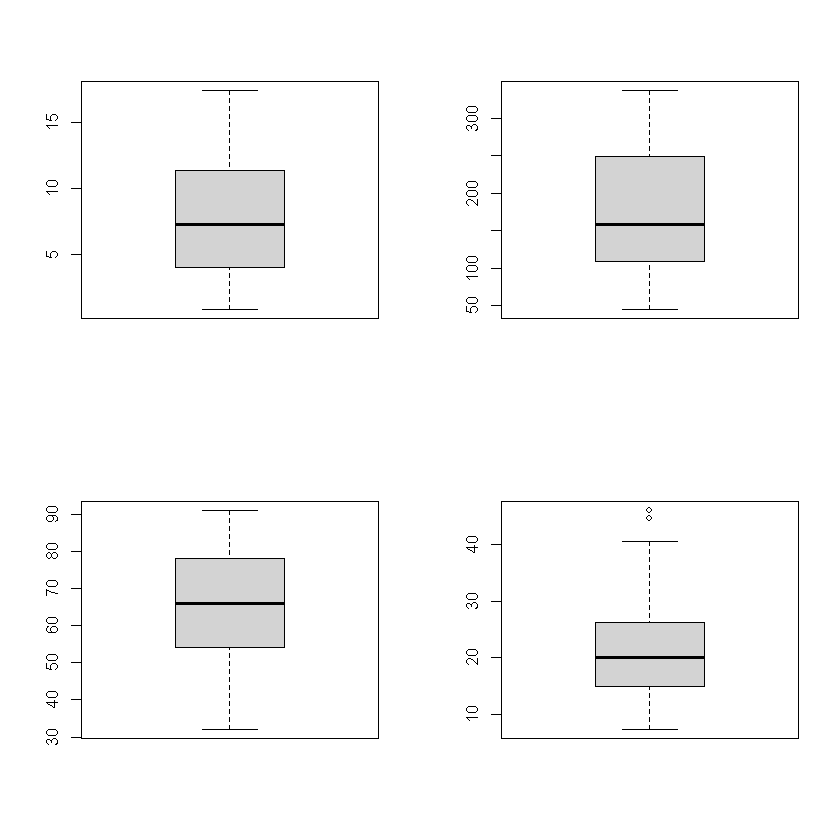

In [64]:
# Lineare Regression und ANOVA, neuer Datensatz
USArrests <- USArrests

# Annahmen prüfen, Outliers
par(mfrow = c(2, 2))
boxplot(USArrests$Murder, data=USArrests)
boxplot(USArrests$Assault, data=USArrests)
boxplot(USArrests$UrbanPop, data=USArrests)
boxplot(USArrests$Rape, data=USArrests)

In [65]:
# LM Model
lm_model2 <- lm(Murder ~ Assault + UrbanPop + Rape, data=USArrests)
summary(lm_model2)

# AOV
USArrests.aov <- aov(lm_model2)
summary(USArrests.aov)


Call:
lm(formula = Murder ~ Assault + UrbanPop + Rape, data = USArrests)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.3990 -1.9127 -0.3444  1.2557  7.4279 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.276639   1.737997   1.885   0.0657 .  
Assault      0.039777   0.005912   6.729 2.33e-08 ***
UrbanPop    -0.054694   0.027880  -1.962   0.0559 .  
Rape         0.061399   0.055740   1.102   0.2764    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.574 on 46 degrees of freedom
Multiple R-squared:  0.6721,	Adjusted R-squared:  0.6507 
F-statistic: 31.42 on 3 and 46 DF,  p-value: 3.322e-11


            Df Sum Sq Mean Sq F value   Pr(>F)    
Assault      1  597.7   597.7  90.195 2.05e-12 ***
UrbanPop     1   19.0    19.0   2.864   0.0974 .  
Rape         1    8.0     8.0   1.213   0.2764    
Residuals   46  304.8     6.6                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

### Resultat ANOVA (einfaktorielle Varianzanalyse) lineare Regression
<div style="text-align: justify;">
    
- Es gibt keine Outliers (nur zwei bei rape, sind vernachlässigbar), somit sind alle Annahmen unverletzt. Im Boxplot sind keine Outliers zu erkennen.

- Die Variable Assault ist dem Modell am wichtigsten. Der p-value 3.322e-11 bei dem AOV sagt, dass die Mittelwerte über den Gruppen nicht gleich sein kann.
</div>

# Beschreibung Ergebnisse logistische Regression
<div style="text-align: justify;">
Die Ergebnisse kommen alle bei den bereits erwähnten Resultaten vor.
</div>

# Analyse/Hinterfragen Ergebnisse logistische Regression
<div style="text-align: justify;">
Die Analyse der Ergebnisse kommt bei den bereits erwähnten Resultaten vor.
</div>

# Quellenangaben
<div style="text-align: justify;">

-   Daten von R (24.12.2024)
    
- Einfaktorielle Varianzanalyse (ANOVA) in R rechnen, https://bjoernwalther.com/einfaktorielle-varianzanalyse-anova-in-r-rechnen/ 
(13.10.2024)

- Chapter 3 Effect sizes,
https://bookdown.org/content/f9d035ed-86ea-4779-ad01-31acc973f0dd/3-effect-sizes.html
(13.10.2024)

- How to Interpret Cohen’s d (With Examples), https://www.statology.org/interpret-cohens-d/
(13.10.2024)

- Quellen FFHS Videos,
(13.10.2024)
</div>